# Rental Property Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:

# Import Data 

In [2]:
#Imported path
path = r'/Users/james/Desktop/Task6'

In [3]:
path

'/Users/james/Desktop/Task6'

In [4]:
df = pd.read_csv('/Users/james/Desktop/Task6/Housing.New.csv')

In [5]:
df.head()

,Unnamed: 0,State,City,Postal_Code,Year_Constructed,Total_Rent,Base_Rent,Service_Charge,Living_Space_(m2),N_Rooms,...,Condition,Balcony,Price_Trend,Has_Kitchen,Lift,Flat_Type,Garden,Floor,Price_per_m2,Rent_range
0,0,Nordrhein_Westfalen,Dortmund,44269,1965.0,840.000000,595.0,245.00,86.00,4.0,...,well_kept,False,4.62,False,False,ground_floor,True,1.0,6.918605,Average rent
1,1,Rheinland_Pfalz,Rhein_Pfalz_Kreis,67459,1871.0,895.331385,800.0,134.00,89.00,3.0,...,refurbished,True,3.47,False,False,ground_floor,False,0.0,8.988764,low rent
2,2,Sachsen,Dresden,1097,2019.0,1300.000000,965.0,255.00,83.80,3.0,...,first_time_use,True,2.72,False,True,apartment,False,3.0,11.515513,High rent
3,3,Sachsen,Mittelsachsen_Kreis,9599,1964.0,895.331385,343.0,58.15,58.15,3.0,...,NaN,True,1.53,False,False,other,False,3.0,5.898538,Average rent
4,4,Bremen,Bremen,28213,1950.0,903.000000,765.0,138.00,84.97,3.0,...,refurbished,True,2.46,False,False,apartment,False,1.0,9.003178,Average rent


In [6]:
df=df[['Year_Constructed', 'Total_Rent']]

In [7]:
df.head()

,Year_Constructed,Total_Rent
0,1965.0,840.000000
1,1871.0,895.331385
2,2019.0,1300.000000
3,1964.0,895.331385
4,1950.0,903.000000


# Data Subsetting 

In [8]:
# Creating a new dataframe

data = df.groupby('Year_Constructed').agg({'Total_Rent': ['median']})

In [9]:
data

,Total_Rent
,median
Year_Constructed,
1000.0,580.000000
1005.0,499.000000
1007.0,895.331385
1027.0,495.800000
1036.0,1260.000000
...,...
2021.0,1026.890000
2022.0,756.165692


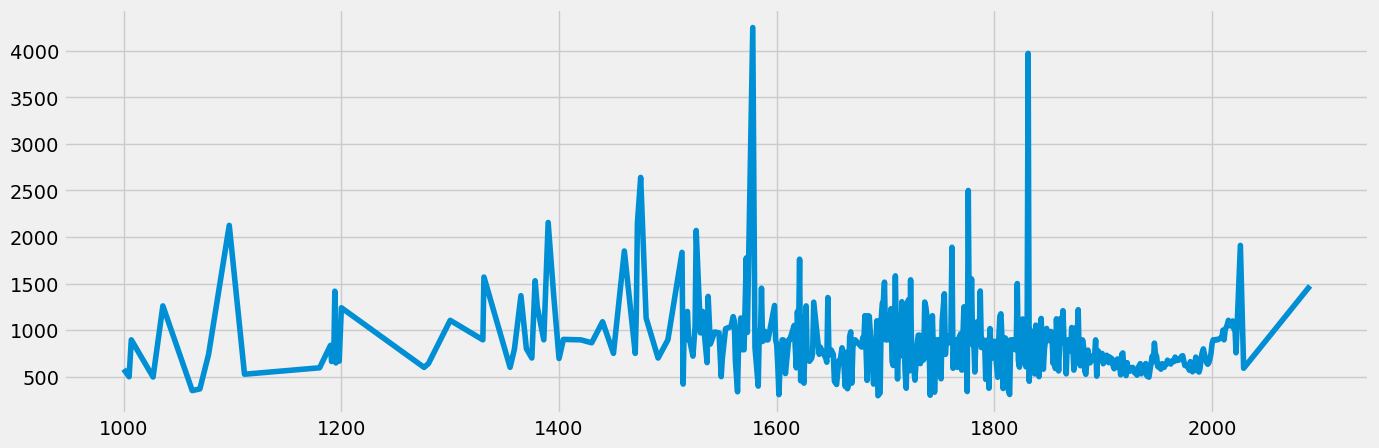

In [10]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

# Time-series analysis: decomposition

In [11]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=1)

In [12]:
# Defining a fixed size for all special charts

from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

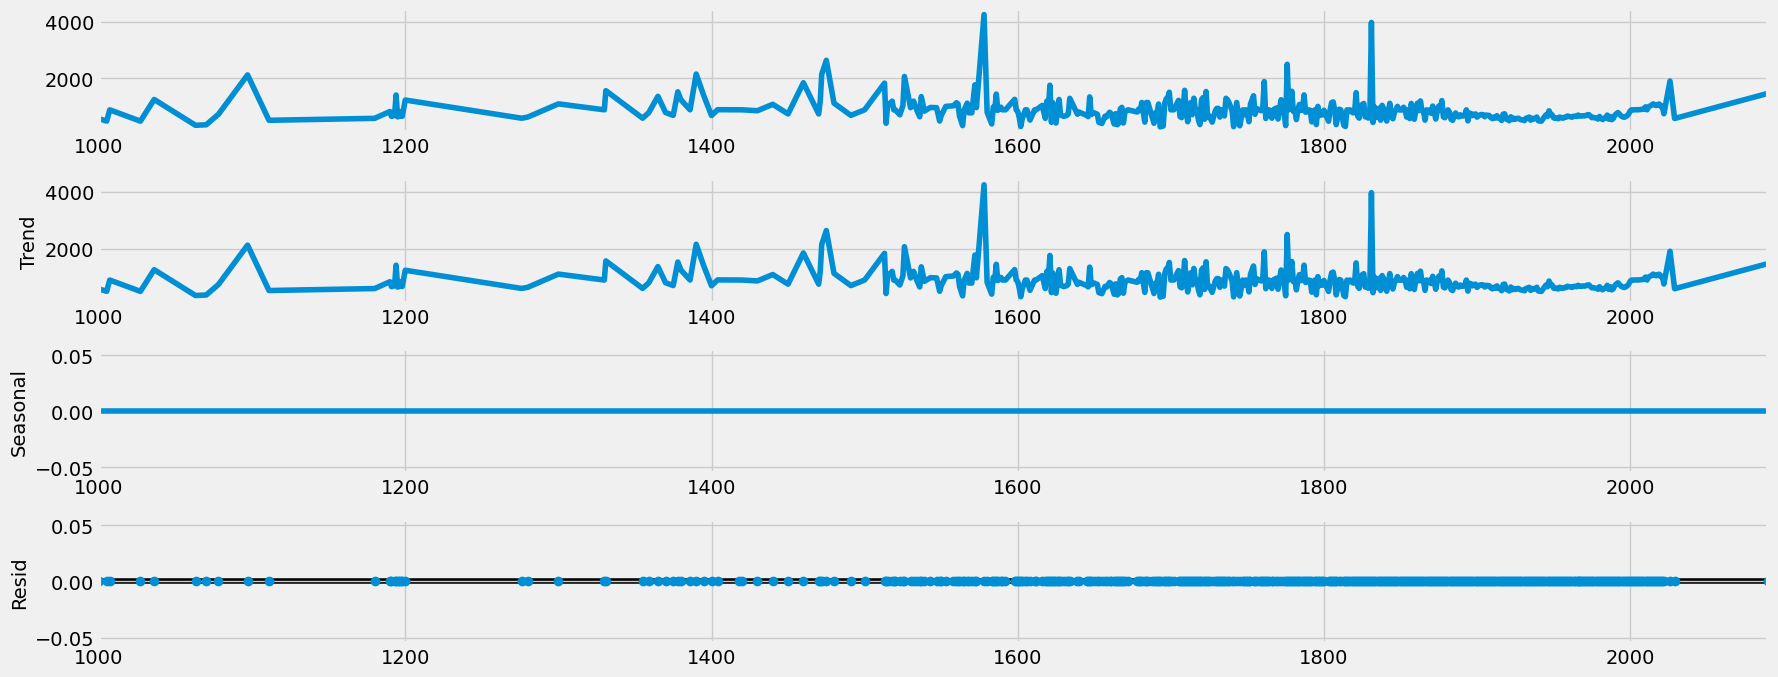

In [13]:
# Plotting decomposition of time-series data

decomposition.plot()
plt.show()

# Testing for stationarity

# Dicker-Fuller Test:

In [14]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
dickey_fuller(data['Total_Rent'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.155539
p-value                          0.022707
Number of Lags Used             11.000000
Number of Observations Used    454.000000
Critical Value (1%)             -3.444836
Critical Value (5%)             -2.867927
Critical Value (10%)            -2.570172
dtype: float64


In [15]:
# The obtained test statistic of -3.155539 exceeds the critical value of -2.867927 at the 5% significance level. Therefore, based on this comparison, there is insufficient evidence to reject the null hypothesis.

# Auto-correlation Test:

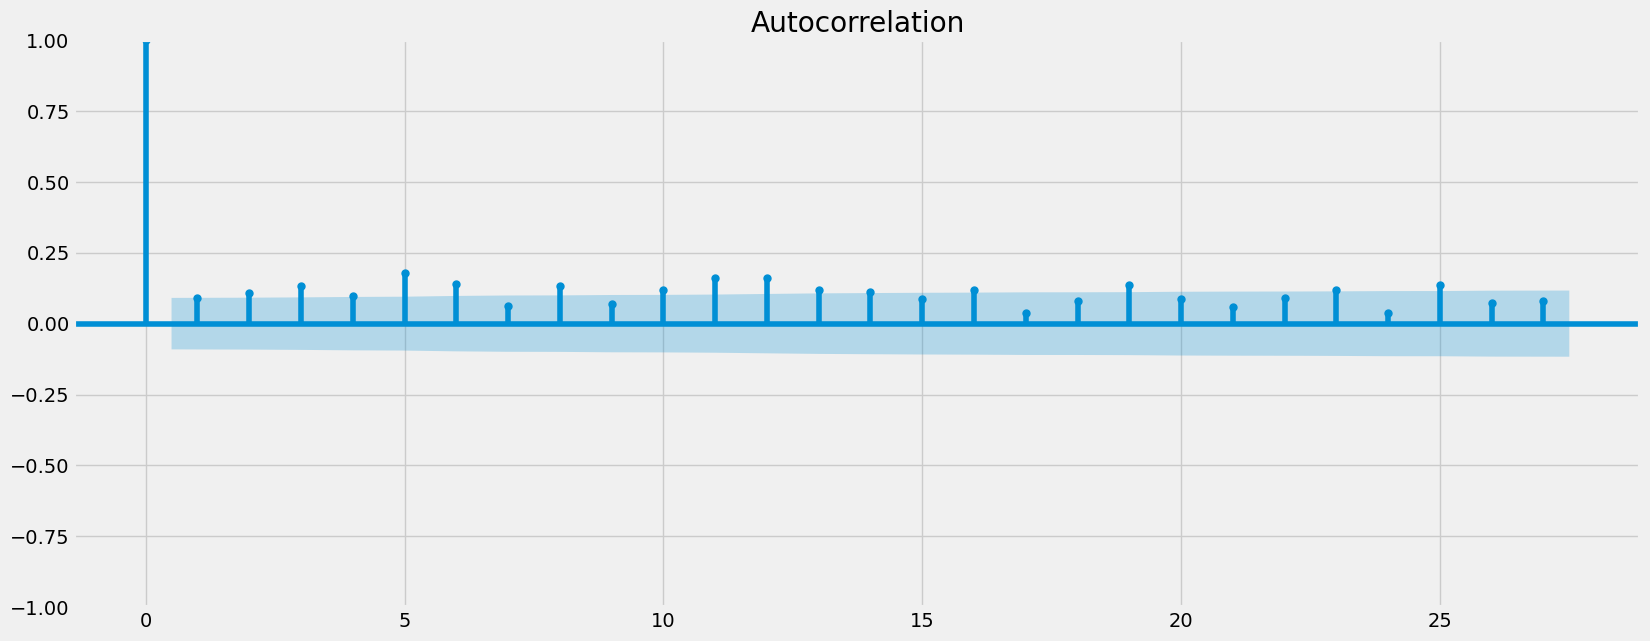

In [16]:
# Checking plot of autocorrelation

# Importing the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plt.show()

# Stationarizing the Rental data

In [17]:
data_diff = data - data.shift(1)

In [18]:
data_diff.dropna(inplace = True)

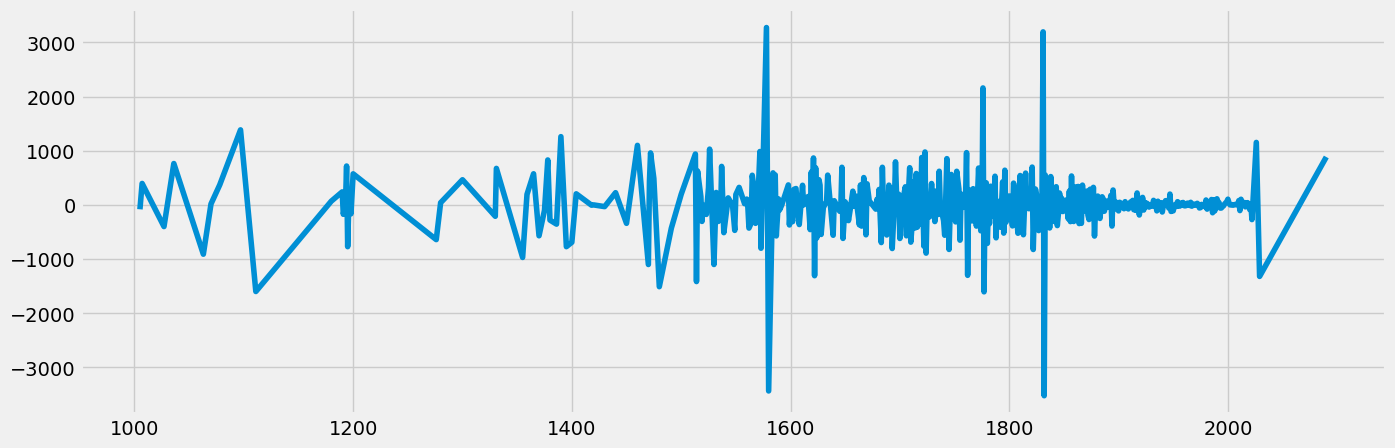

In [19]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [20]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.037767e+01
p-value                        2.180099e-18
Number of Lags Used            1.200000e+01
Number of Observations Used    4.520000e+02
Critical Value (1%)           -3.444900e+00
Critical Value (5%)           -2.867956e+00
Critical Value (10%)          -2.570187e+00
dtype: float64


In [21]:
# the data now is stationary because p-value<0.05 and Test Statistic < Critical Value

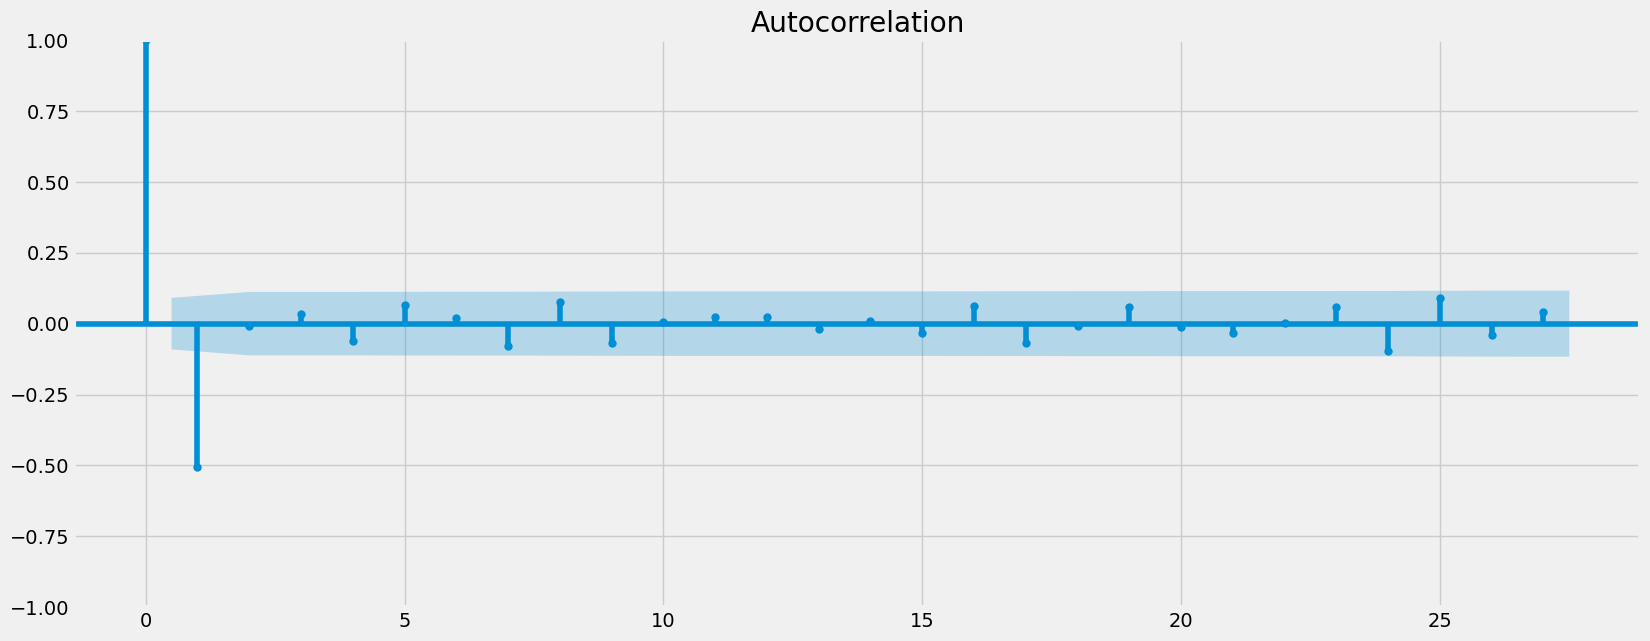

In [22]:
plot_acf(data_diff)
plt.show()

In [23]:
# The autocorrelation plot has shown signs of improvement.